## Load the Dataset and Import All Libraries:
First, we will import the necessary libraries and then load the dataset to understand its structure.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

# Load the dataset
file_path = '/content/drive/MyDrive/Research Paper/Weather Forecast/ExtractedWeather/sorted_temp_and_rain_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


## Delete All Extreme Values and Show Box Plot for Rain and Temperature:
We will first identify and remove the extreme values (outliers) from the 'tem' and 'rain' columns. Then, we'll plot the box plots for these columns vertically. ​

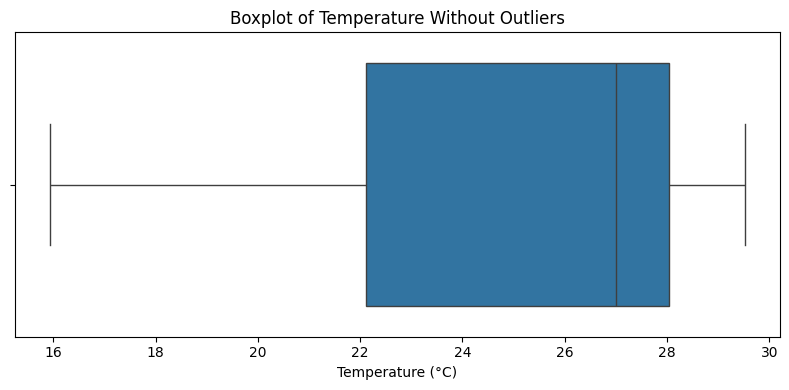

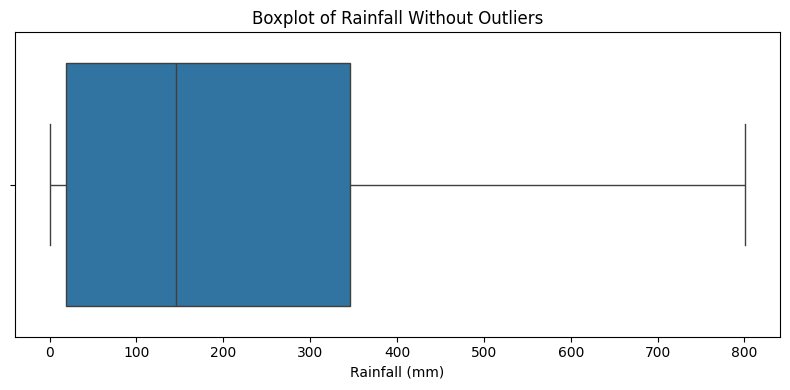

In [ ]:
# Identify and remove extreme values for 'tem' and 'rain'
z_scores_tem = np.abs(stats.zscore(data['tem']))
z_scores_rain = np.abs(stats.zscore(data['rain']))

# Define a threshold for identifying outliers
threshold = 3

# Remove outliers
data_clean = data[(z_scores_tem < threshold) & (z_scores_rain < threshold)]

# Adjusted figsize for a single plot - Temperature Boxplot without Outliers
fig_temp, ax_temp = plt.subplots(figsize=(8, 4))
sns.boxplot(data=data_clean, x='tem', orient='h')  # 'h' for horizontal boxplot
ax_temp.set_title('Boxplot of Temperature Without Outliers')
ax_temp.set_xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

# Adjusted figsize for a single plot - Rainfall Boxplot without Outliers
fig_rain, ax_rain = plt.subplots(figsize=(8, 4))
sns.boxplot(data=data_clean, x='rain', orient='h')  # 'h' for horizontal boxplot
ax_rain.set_title('Boxplot of Rainfall Without Outliers')
ax_rain.set_xlabel('Rainfall (mm)')
plt.tight_layout()
plt.show()

In [ ]:
data_clean.describe()

,tem,Month,Year,rain
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,25.057645,6.490476,1961.882993,200.859356
std,3.702216,3.454594,35.458735,197.464809
min,15.925161,1.000000,1901.000000,0.000000
25%,22.111975,3.000000,1931.000000,19.277351
50%,27.002650,6.000000,1962.000000,145.086000
75%,28.029975,9.000000,1992.750000,345.593750
max,29.526000,12.000000,2023.000000,800.869000


## Prepare Dataset for Train and Test (Split the Dataset):
Next, we will split the cleaned dataset into training and testing sets. This involves separating the features (independent variables) from the target (dependent variable), which we will assume to be 'rain' for this context, as we don't have specific information on what to predict. Please correct me if the target variable is supposed to be different.

In [ ]:
# Splitting the data into features and target variable
X = data_clean[['tem', 'Month', 'Year']]  # Features
y = data_clean['rain']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the sizes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1176, 3), (294, 3), (1176,), (294,))

## Train ML Models (RFR, KNN, DT, SVM, ANN):
We will now train multiple machine learning models: Random Forest Regressor (RFR), K-Nearest Neighbors (KNN), Decision Tree (DT), Support Vector Machine (SVM), and Artificial Neural Network (ANN). We'll then evaluate their performance. Let's start by training these models.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
# Adjusted models with pipeline for feature scaling where necessary
models = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'K-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5)),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVR()),
    'Artificial Neural Network': make_pipeline(StandardScaler(), MLPRegressor(random_state=42, max_iter=500))
}

# Basic hyperparameter settings for demonstration
param_grids = {
    'Random Forest Regressor': {'n_estimators': [100], 'max_depth': [None, 10, 20, 30,40]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30,40]}
}
actual_vs_predicted = {}
# Updated scores dictionary
updated_scores = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'MAPE': [],
    'R^2': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

for name, model in models.items():
    if name in param_grids:
        # Grid search for models with specified hyperparameters
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        # Directly fit models without specified hyperparameters
        best_model = model
        best_model.fit(X_train, y_train)

    # Making predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    train_accuracy = best_model.score(X_train, y_train)
    test_accuracy = best_model.score(X_test, y_test)

    # Storing the scores
    updated_scores['Model'].append(name)
    updated_scores['MAE'].append(mae)
    updated_scores['MSE'].append(mse)
    updated_scores['MAPE'].append(mape)
    updated_scores['R^2'].append(r2)
    updated_scores['Train Accuracy'].append(train_accuracy)
    updated_scores['Test Accuracy'].append(test_accuracy)

    # Store actual vs predicted values
    comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
    actual_vs_predicted[name] = comparison_df

# Convert updated scores dictionary to DataFrame for model evaluation metrics
updated_scores_df = pd.DataFrame(updated_scores)

# Print out the model evaluation metrics
print(updated_scores_df)

# Now, print out the actual vs predicted values for each model
for name, df in actual_vs_predicted.items():
    print(f"\nModel: {name} - Actual vs Predicted")
    print(df.head())  # Display just the first few rows for brevity

                       Model         MAE           MSE          MAPE  \
0    Random Forest Regressor   54.631516   6908.824605  6.330647e+13   
1        K-Nearest Neighbors   55.752879   7265.164797  5.691634e+13   
2              Decision Tree   61.920773   9689.967164  4.639754e+13   
3     Support Vector Machine  100.558349  21685.432228  3.185184e+14   
4  Artificial Neural Network   82.395608  13149.902809  5.217365e+14   

        R^2  Train Accuracy  Test Accuracy  
0  0.817431        0.955938       0.817431  
1  0.808014        0.903100       0.808014  
2  0.743938        0.953167       0.743938  
3  0.426951        0.450198       0.426951  
4  0.652507        0.682655       0.652507  

Model: Random Forest Regressor - Actual vs Predicted
         Actual   Predicted
1043   15.89610    4.677885
184   197.26700  218.008237
1224    4.05949   11.204131
67    388.64100  558.847166
220   350.06200  231.095751

Model: K-Nearest Neighbors - Actual vs Predicted
         Actual   Predict

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Next, let's create the scatter plots to visually compare the performance of the model.

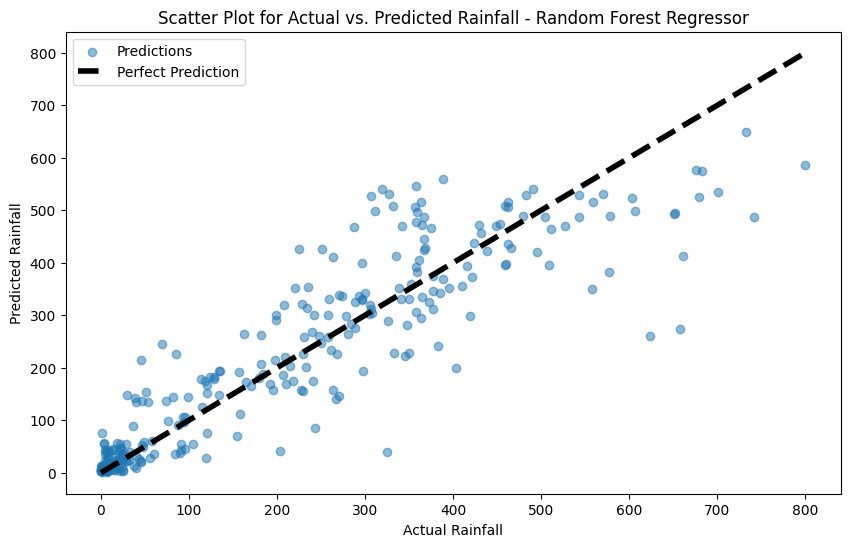

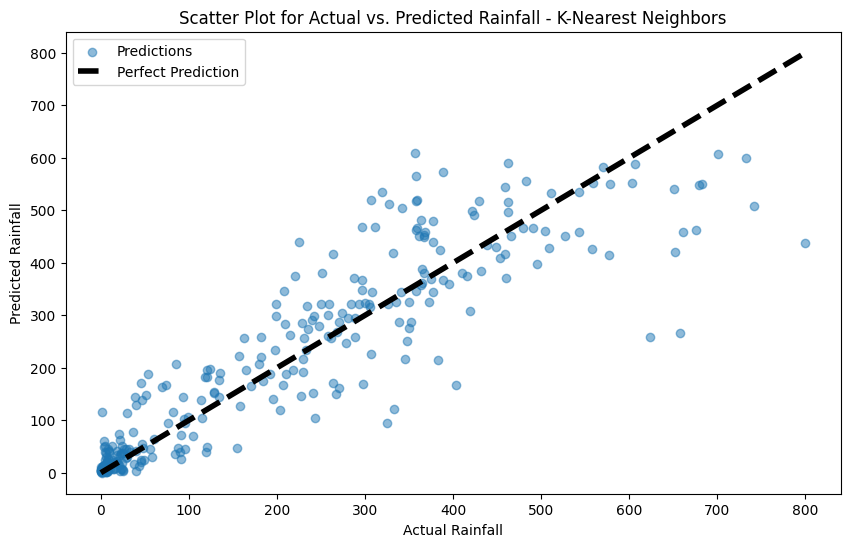

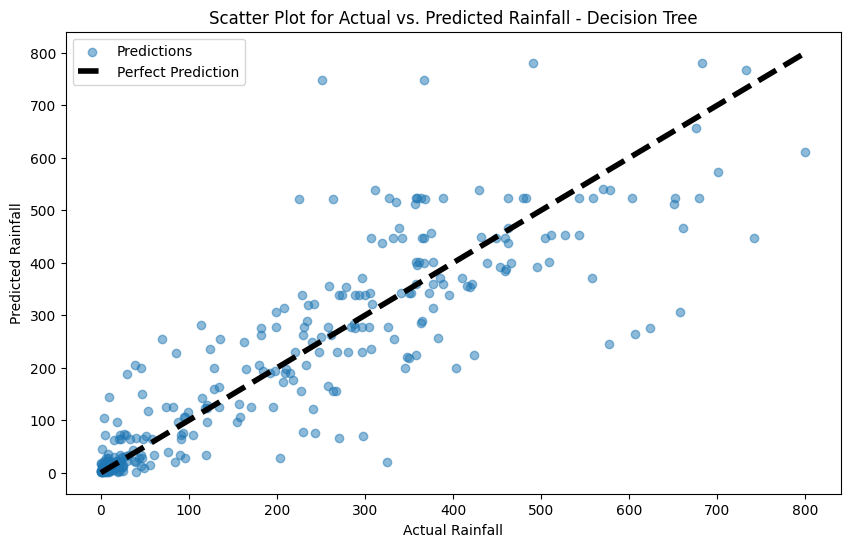

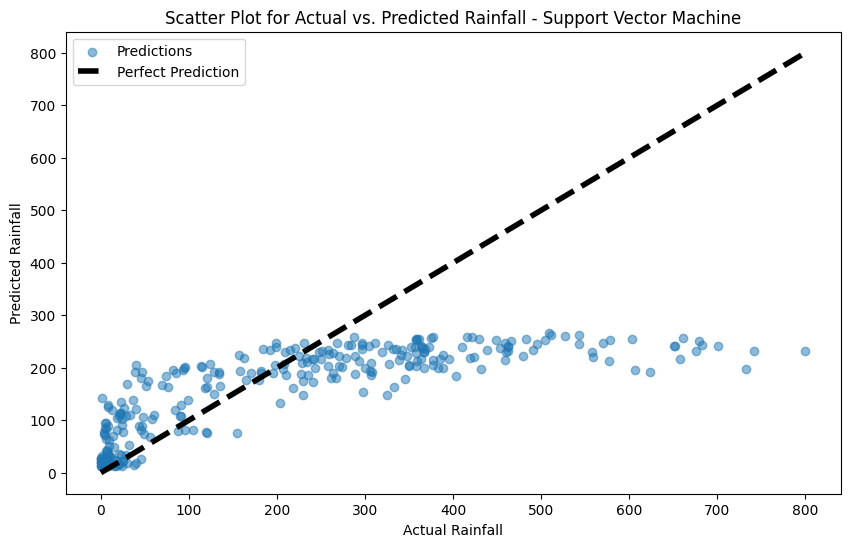

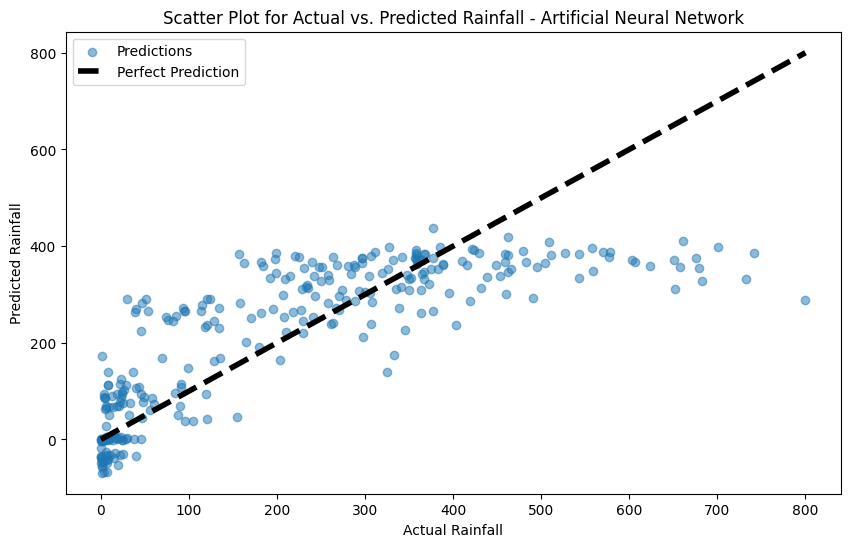

In [ ]:
import matplotlib.pyplot as plt

# Iterate through each model's actual vs predicted data and create scatter plots
for name, df in actual_vs_predicted.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Actual'], df['Predicted'], alpha=0.5, label='Predictions')
    plt.title(f'Scatter Plot for Actual vs. Predicted Rainfall - {name}')
    plt.xlabel('Actual Rainfall')
    plt.ylabel('Predicted Rainfall')
    # Line for perfect prediction
    plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'k--', lw=4, label='Perfect Prediction')
    plt.legend()
    plt.show()

## Graph Representation of Actual Data from 1901-2023 and Prediction Data for 2016-2023:
Next, we'll visualize the actual data from 1901 to 2023 and the predicted data from 2016 to 2023. This requires filtering and preparing the data accordingly. Let's proceed with this visualization. ​

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


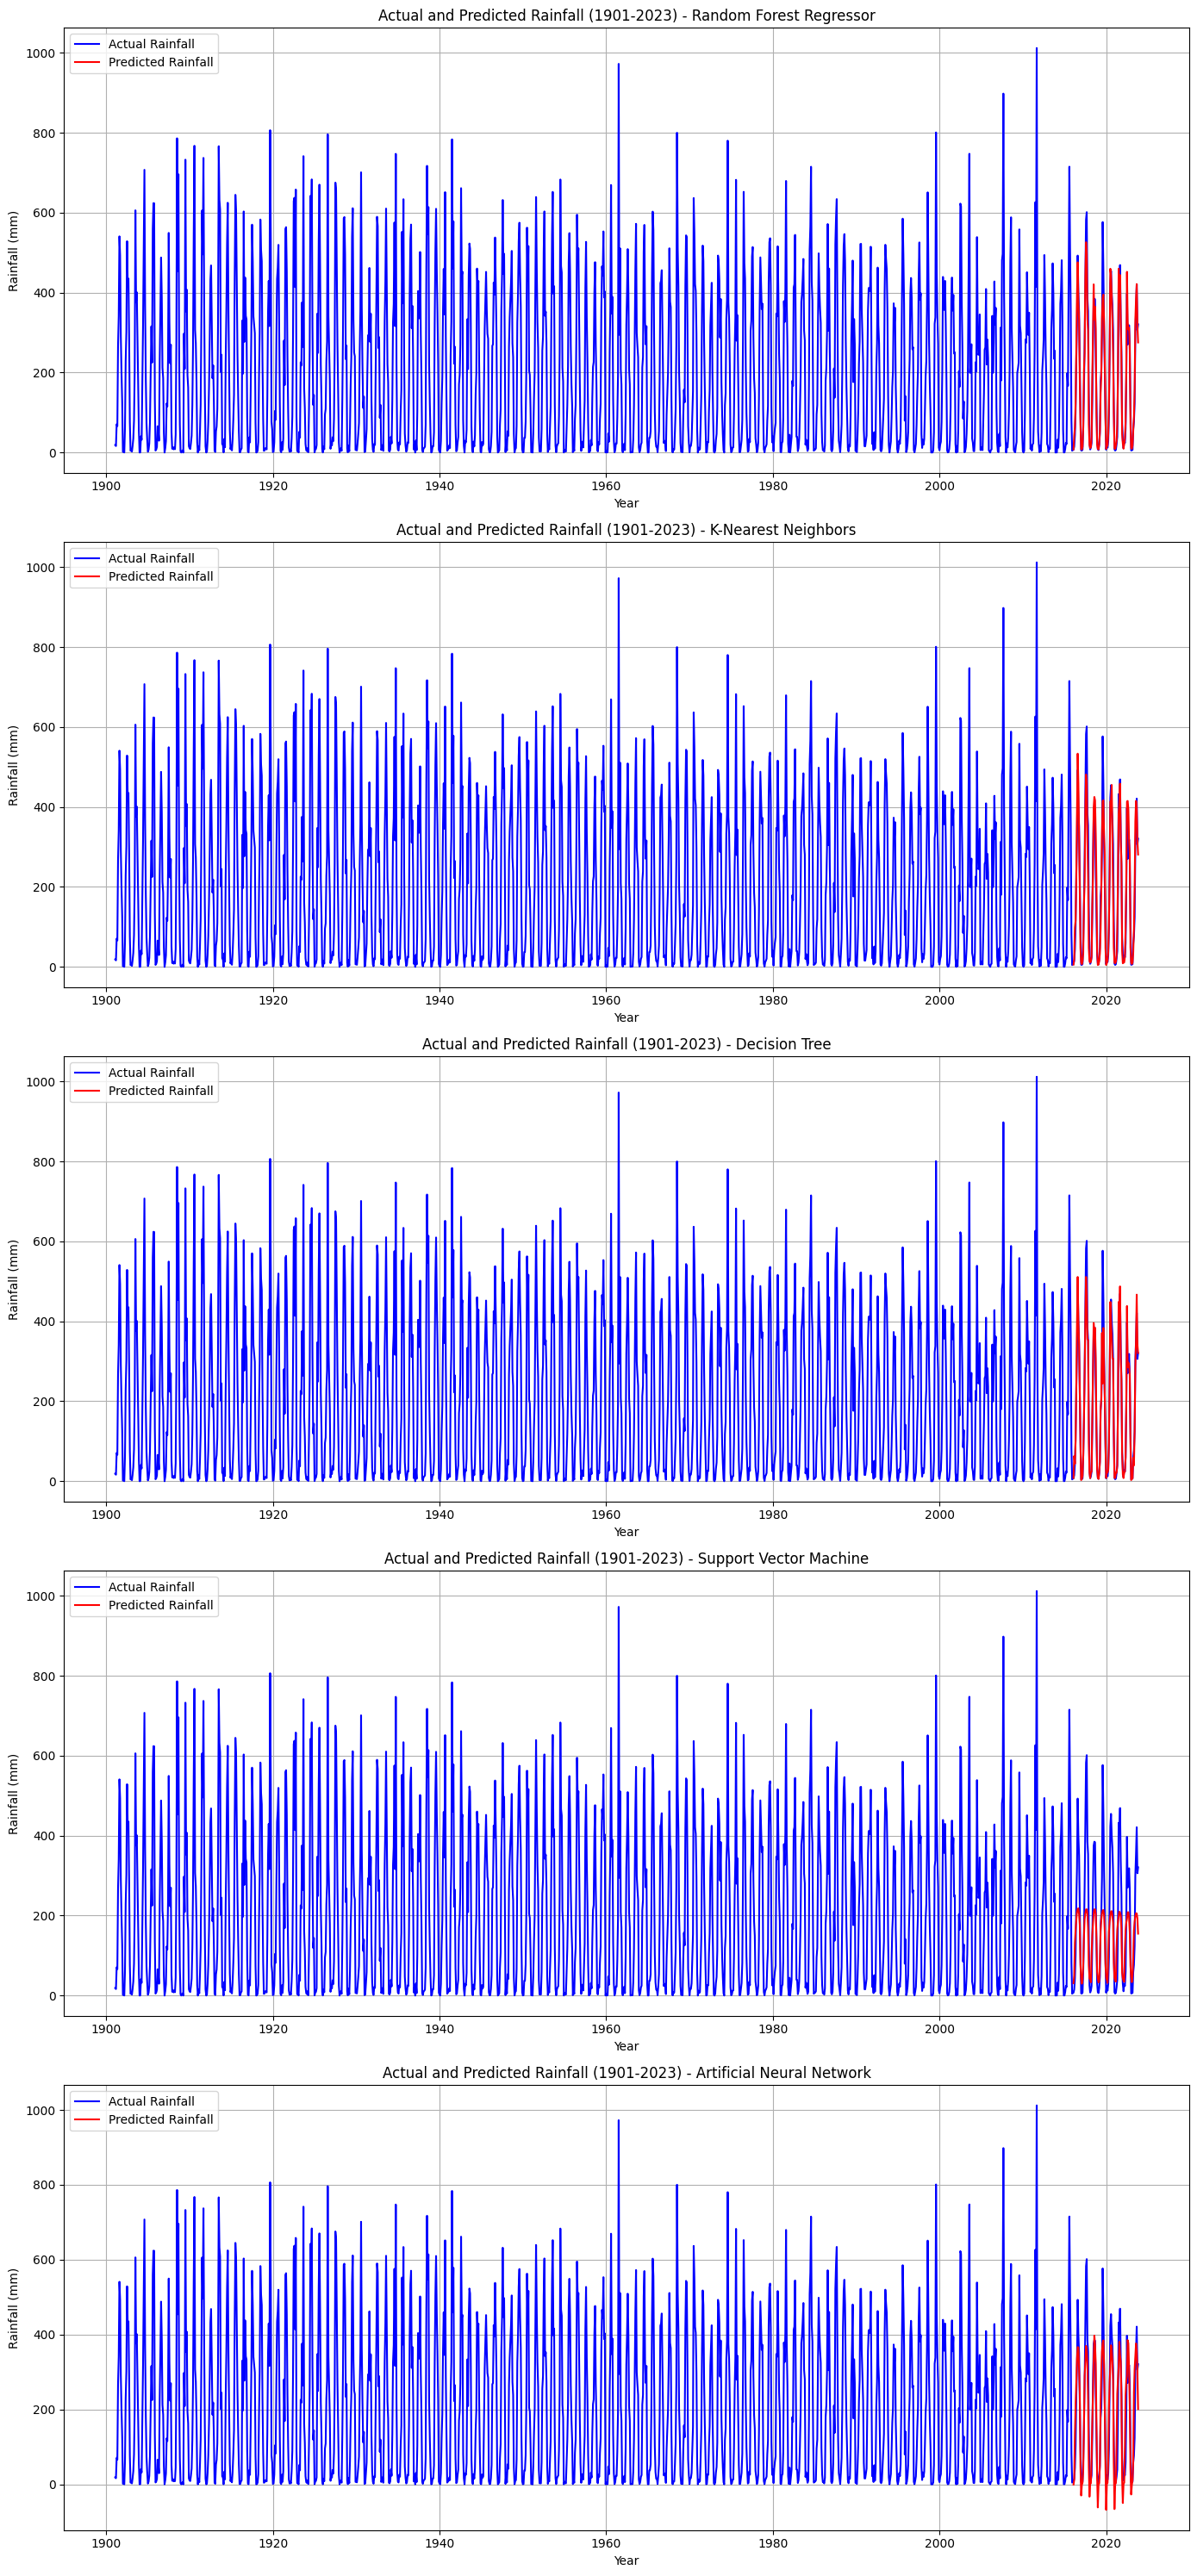

In [ ]:
from sklearn.base import clone

# Re-initialize the models to ensure they are not fitted
trained_models = {}
for name, model in models.items():
    # Clone the original model to ensure we're working with a fresh, unfitted version
    fresh_model = clone(model)

    # Check if we should apply GridSearchCV
    if name in param_grids:
        grid_search = GridSearchCV(fresh_model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        trained_models[name] = grid_search.best_estimator_
    else:
        fresh_model.fit(X_train, y_train)
        trained_models[name] = fresh_model

# Now, use trained_models for predictions and visualization
# Assuming 'data_clean' is correctly prepared with historical data
actual_data = data_clean[(data_clean['Year'] >= 1901) & (data_clean['Year'] <= 2023)]

# Set up visualization
num_models = len(trained_models)
fig, axes = plt.subplots(num_models, 1, figsize=(14, 6 * num_models))
if num_models == 1:
    axes = [axes]  # Make iterable if only one model

for ax, (name, model) in zip(axes, trained_models.items()):
    # Prepare the data for prediction within the 2016-2023 range
    prediction_data = actual_data[(actual_data['Year'] >= 2016) & (actual_data['Year'] <= 2023)]

    # Use the trained model for predictions
    predicted_rainfall = model.predict(prediction_data[['tem', 'Month', 'Year']])
    prediction_data = prediction_data.copy()  # Avoid SettingWithCopyWarning
    prediction_data['Predicted_Rain'] = predicted_rainfall

    # Plotting the actual and predicted data
    ax.plot(actual_data['Year'] + actual_data['Month'] / 12, actual_data['rain'], label='Actual Rainfall', color='blue')
    ax.plot(prediction_data['Year'] + prediction_data['Month'] / 12, prediction_data['Predicted_Rain'], label='Predicted Rainfall', color='red')

    # Enhancing the plot
    ax.set_title(f'Actual and Predicted Rainfall (1901-2023) - {name}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (mm)')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## Predict the Next 50 Years Rainfall Data (2024-2074) in Monthly Attribute:
Now, we will predict the rainfall for the next 50 years on a monthly basis. This involves creating a new dataset for these years and using our best-performing model for prediction. Let's proceed with this. ​

In [ ]:
import numpy as np
import pandas as pd

# Assuming 'data' contains your original dataset
# Calculate monthly average temperatures from historical data
monthly_avg_temps = data.groupby('Month')['tem'].mean().reset_index()

# Generating a new DataFrame for future predictions (2024-2074)
future_years = np.arange(2024, 2075)
future_months = np.arange(1, 13)

# Create a mesh of years and months for all combinations
future_mesh = np.array(np.meshgrid(future_years, future_months)).T.reshape(-1, 2)
future_df_base = pd.DataFrame(future_mesh, columns=['Year', 'Month'])

# Merge this average temperature with the future_df based on 'Month'
future_df_base = future_df_base.merge(monthly_avg_temps, on='Month', how='left')

# Initialize a dictionary to store future predictions for each model
future_predictions = {}

# Iterate over each fitted model to predict future rainfall
for name, model in models.items():
    # Check if this is a model from GridSearchCV and use the best estimator
    if name in param_grids:
        # Use the best estimator from the grid search
        fitted_model = grid_search.best_estimator_
    else:
        # Use the model as is (it's already fitted)
        fitted_model = model

    # Predicting rainfall for the future years using the fitted model
    future_rainfall = fitted_model.predict(future_df_base[['tem', 'Month', 'Year']])

    # Adding the predicted rainfall to the future dataframe
    future_df = future_df_base.copy()
    future_df['Predicted_Rain'] = future_rainfall

    # Store the future predictions in the dictionary
    future_predictions[name] = future_df

# Now, you can access the future predictions for each model
for model_name, future_df in future_predictions.items():
    print(f"\nFuture predictions by {model_name}:")
    print(future_df.head(24))  # Display the first few rows for brevity


Future predictions by Random Forest Regressor:
    Year  Month        tem  Predicted_Rain
0   2024      1  18.216612        5.600262
1   2024      2  20.538738       21.814789
2   2024      3  24.985403       24.043375
3   2024      4  27.572184      176.648228
4   2024      5  28.086901      251.969403
5   2024      6  28.146265      400.077390
6   2024      7  28.028765      511.101971
7   2024      8  28.079798      487.490305
8   2024      9  28.008129      289.154187
9   2024     10  26.719400      265.741351
10  2024     11  23.054695      119.180611
11  2024     12  19.297161       21.246886
12  2025      1  18.216612        5.600262
13  2025      2  20.538738       21.814789
14  2025      3  24.985403       24.043375
15  2025      4  27.572184      176.648228
16  2025      5  28.086901      251.969403
17  2025      6  28.146265      400.077390
18  2025      7  28.028765      511.101971
19  2025      8  28.079798      487.490305
20  2025      9  28.008129      289.154187
21  20

## Show the Graph of Prediction for the Next 50 Years:
We will plot the predicted rainfall for the next 50 years.

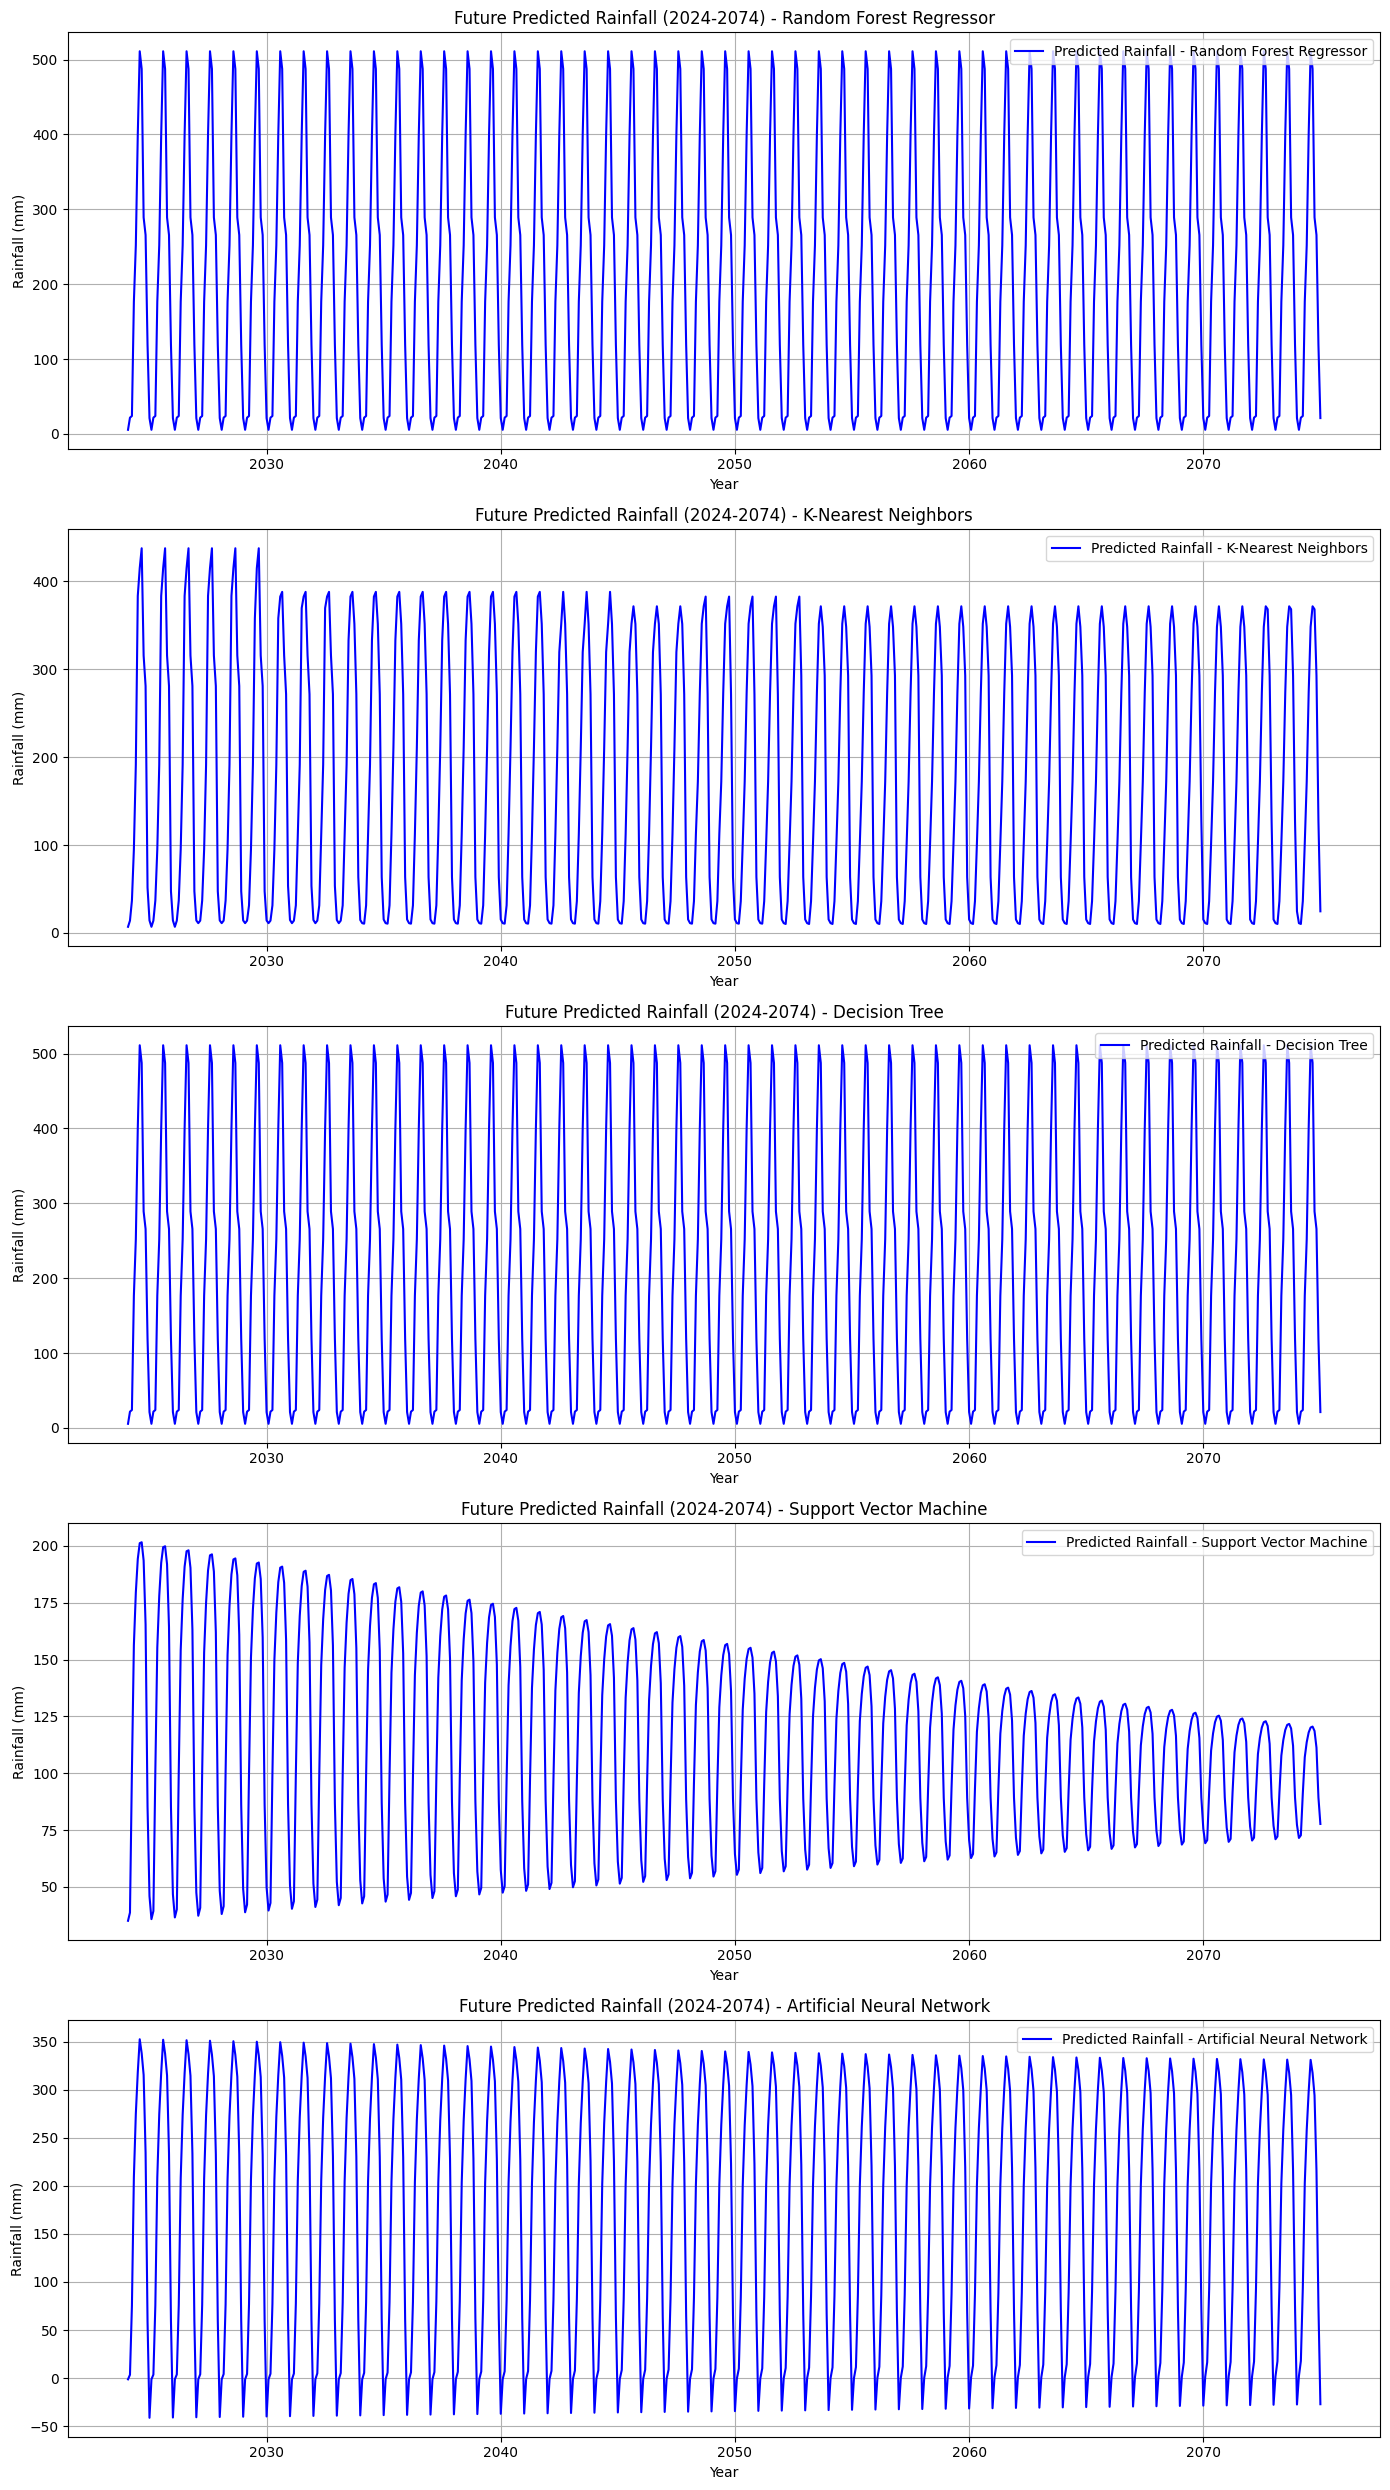

In [ ]:
# Set up the matplotlib figure - one figure for each model
num_models = len(future_predictions)
fig, axes = plt.subplots(num_models, 1, figsize=(14, 5 * num_models))  # Adjust the size based on the number of models

# Check if we have a single axis or multiple (happens when there's only one model)
if num_models == 1:
    axes = [axes]  # Wrap it in a list to make iterable

# Loop through each model and its corresponding axis
for ax, (model_name, future_df) in zip(axes, future_predictions.items()):
    # Plot the predicted rainfall
    ax.plot(future_df['Year'] + future_df['Month'] / 12, future_df['Predicted_Rain'], label=f'Predicted Rainfall - {model_name}', linestyle='-', color='blue')

    # Enhance the plot with proper labels, title and grid
    ax.set_title(f'Future Predicted Rainfall (2024-2074) - {model_name}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (mm)')
    ax.grid(True)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## ARIMA

In [ ]:
file_path = '/content/drive/MyDrive/Research Paper/Weather Forecast/ExtractedWeather/sorted_temp_and_rain_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Creating a new column for last month's rainfall
data['last_month_rain'] = data['rain'].shift(1)
data = data_clean.dropna()  # Removing NaN values that arise due to shifting

# Display the first few rows to confirm the new column is correctly added
data.head()

,tem,Month,Year,rain,last_month_rain
1,19.9026,2,1901,16.2548,18.5356
2,24.3158,3,1901,70.7981,16.2548
3,28.1834,4,1901,66.1616,70.7981
4,27.8892,5,1901,267.2150,66.1616
5,28.8925,6,1901,341.0420,267.2150


## Split the data

In [ ]:
# Splitting the updated dataset into training and testing sets while maintaining chronological order
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(data) * split_ratio)

# Split the data while maintaining the time series order
train_data = data[:split_index]
test_data = data[split_index:]

# ARIMA Model should be applied to the 'rain' series, but we will consider 'last_month_rain' for its predictions
# Let's check the first few entries of the training data to confirm everything is correct
train_data.head()

,tem,Month,Year,rain,last_month_rain
1,19.9026,2,1901,16.2548,18.5356
2,24.3158,3,1901,70.7981,16.2548
3,28.1834,4,1901,66.1616,70.7981
4,27.8892,5,1901,267.2150,66.1616
5,28.8925,6,1901,341.0420,267.2150


## Model
Next, we'll move on to training the ARIMA model. Since ARIMA is primarily used for time series forecasting, we'll focus on one variable at a time. Let's start by preparing the dataset specifically for the ARIMA model, which involves checking for stationarity and determining the order of differencing (d), autoregressions (p), and moving averages (q) needed for the model. We'll initially focus on the 'rain' data for this example. Let's proceed with these steps.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA, we traditionally use the series itself for forecasting. Here, we'll continue with 'rain'.
# Re-fitting ARIMA model using only the 'rain' from training data, adhering to standard ARIMA practices
model_rain_updated = ARIMA(train_data['rain'], order=(1, 0, 1))  # We keep the same order as before for simplicity
model_rain_fit_updated = model_rain_updated.fit()

# Now let's forecast the rain for the test period
forecasted_rain = model_rain_fit_updated.predict(start=len(train_data), end=len(data)-1)

# Preparing actual vs predicted values table for visualization
comparison_df = test_data[['rain']].copy()
comparison_df['predicted_rain'] = forecasted_rain.values  # Inserting predicted values

# Showing the first few rows of the actual vs predicted values
comparison_df.head(24)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

,rain,predicted_rain
1178,5.22216,61.291957
1179,50.62880,111.429549
1180,322.27400,143.886998
1181,338.12300,164.898895
1182,800.86900,178.501315
1183,453.25500,187.307080
1184,340.81600,193.007646
1185,272.28000,196.698007
1186,12.54470,199.087027
1187,5.91518,200.633601
